<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow :
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other comination of variables, even shorter...predicting a number.

### Hyperparameter & Typical value :
* Input layer shape - Same shape as number of input features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific generally 10 to 100
* Output layer shape - Same shape as desired prediction shape
* Hidden Activation - Usually ReLU (rectified linear unit)
* Output Activation - None, ReLU, logistic/tanh
* Loss function - MSE (mean squared error) or MAE (mean absolute error) / Huber (combination of MAE/MSE) if outliers
* Optimizer - SGD (Stochastic gradient descent), ADAM

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit -

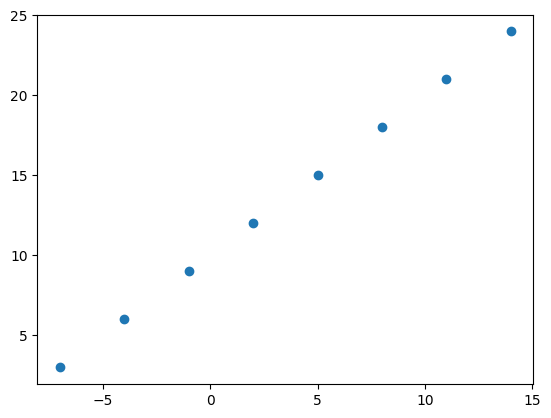

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels -
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it -
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes -

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [9]:
# Turn our numpy arrays into tensors with dtype as float 32.
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with Tensorflow -
- **Creating a model** - define the input and output layers, as well as the layers of a deeplearning model.
- **Compililng a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
- **Fitting the model** - letting the model try to find patterns between X and y (features and labels)

In [11]:
# Add one extra dimension to the input value to become compataible with the model.
X = tf.reshape(X, (-1, 1))

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short form of mean absolute error

# 4. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 448ms/step - loss: 15.6480 - mae: 15.6480
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 15.3667 - mae: 15.3667
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 15.0855 - mae: 15.0855
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.8582 - mae: 14.8582
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 14.7257 - mae: 14.7257


In [13]:
# # Optional methodology -
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try to make a prediction using our model:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 35ms/step


array([[-5.473968]], dtype=float32)

In [18]:
y_pred + 11

array([[5.526032]], dtype=float32)

### Steps in modelling with Tensorflow -
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  * **Loss** - how wrong your model's predictions are compared to the truth labels (we need to minimise this).
  * **Optimizer** - how your model should update its internal patterns to better its predictions.
  * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
  * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)


## Improving our Model -
we can improve our model by altering our steps we took to create a model.
1. **Creating a Model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer ) or on more data (give the model more examples to learn from).

In [19]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 7.7856 - mae: 7.7856
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6531 - mae: 7.6531
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5206 - mae: 7.5206
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4438 - mae: 7.4438
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - lo

In [20]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved ...
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[30.298334]], dtype=float32)

In [22]:
# Let's see if we can make another change to improve our model -

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 959ms/step - loss: 13.1693 - mae: 13.1693
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7132 - mae: 12.7132
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 12.2538 - mae: 12.2538
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7890 - mae: 11.7890
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 11.3119 - mae: 11.3119
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8212 - mae: 10.8212
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3393 - mae: 10.3393
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8317 - mae: 9.8317
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.2941 - mae: 9.2941
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7229 - mae: 8.7229
Epoch 11/100
1/1 [==============================] - 0s

In [23]:
# Let's remind ourselves of the data -
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[32.15468]], dtype=float32)

In [25]:
# Let's see if we can make another change to improve our model - now No activation function and reduced hidden units.

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 655ms/step - loss: 14.2068 - mae: 14.2068
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7185 - mae: 13.7185
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2328 - mae: 13.2328
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7469 - mae: 12.7469
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2585 - mae: 12.2585
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7651 - mae: 11.7651
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2639 - mae: 11.2639
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7526 - mae: 10.7526
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2283 - mae: 10.2283
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6886 - mae: 9.6886
Epoch 11/100
1/1 [==============================] -

In [26]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 134ms/step


array([[29.831583]], dtype=float32)

In [27]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 942ms/step - loss: 13.4946 - mae: 13.4946
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.4218 - mae: 13.4218
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3491 - mae: 13.3491
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2763 - mae: 13.2763
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2035 - mae: 13.2035
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1307 - mae: 13.1307
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0579 - mae: 13.0579
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9850 - mae: 12.9850
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9121 - mae: 12.9121
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8391 - mae: 12.8391
Epoch 11/100
1/1 [==============================

In [28]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[31.970484]], dtype=float32)

In [33]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer with learning rate

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 577ms/step - loss: 14.6372 - mae: 14.6372
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5672 - mae: 14.5672
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4973 - mae: 14.4973
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4274 - mae: 14.4274
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.3576 - mae: 14.3576
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.2878 - mae: 14.2878
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2182 - mae: 14.2182
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 14.1486 - mae: 14.1486
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0791 - mae: 14.0791
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0096 - mae: 14.0096
Epoch 11/100
1/1 [==============================

In [34]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 123ms/step


array([[25.912535]], dtype=float32)

## Evaluating a model

In practice , typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


#### When it comes to evaluation ... there are 3 words you should memorize:
> "visualize, Visualize, Visualize"

It is always a good idea to visualize -
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original lables).

In [35]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset -
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

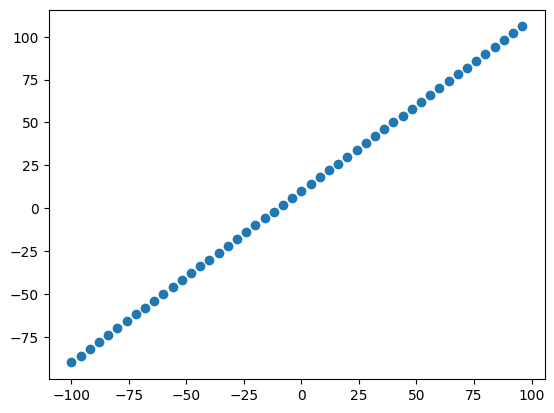

In [37]:
# Visualize the data:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
### The Three sets ..